## 1.Frequent Category Imputation

In [2]:
import pandas as pd
df = pd.read_csv('loan.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df = pd.read_csv('loan.csv',usecols= ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [9]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [8]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [10]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

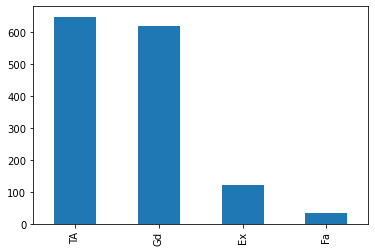

In [13]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

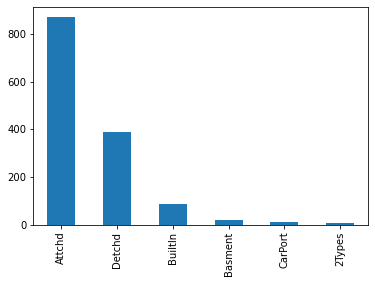

In [14]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

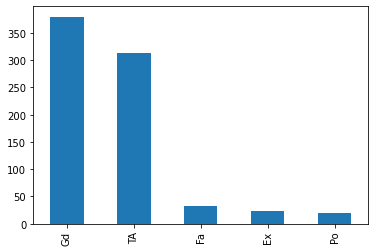

In [15]:
df['FireplaceQu'].value_counts().plot.bar()

<AxesSubplot:>

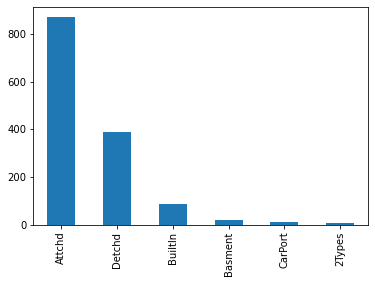

In [16]:
df['GarageType'].value_counts().plot.bar()

In [18]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [20]:
df['GarageType'].mode()[0]

'Attchd'

In [21]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [23]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [24]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages

1.Easy to implement.

2.Fater Way to implement.

#### Disadvantages

1.Since we are using the more frequent labels,it may use them in an over represented way,if there are many nan's.

2.it distorts the relation of the most frequent label.

<AxesSubplot:>

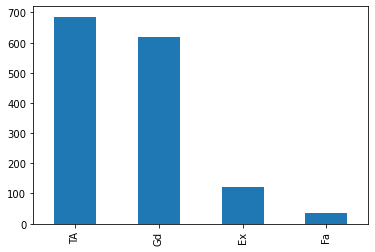

In [27]:
df['BsmtQual'].value_counts().plot.bar()

## 2. Adding a variable to capture Nan

In [28]:
df = pd.read_csv('loan.csv',usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [29]:
import numpy as np
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [30]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [31]:
def impute_nan(df,variable):
    df[variable+'_var'] = np.where(df[variable].isnull(),1,0)

In [33]:
for feature in ['FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [34]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,NaN,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


In [39]:
def frequent(df,variable):
    mode = df[variable].mode()[0]
    df[variable].fillna(mode,inplace=True)

In [40]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    frequent(df,feature)

In [41]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


#### Suppose if you have more frequent categories,we just replace Nan with a new category

In [42]:
df = pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [44]:
def impute_nan(df,variable):
    df[variable+'newvar']=np.where(df[variable].isnull(),'Missing',df[variable])

In [45]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [47]:
df.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [48]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [49]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
